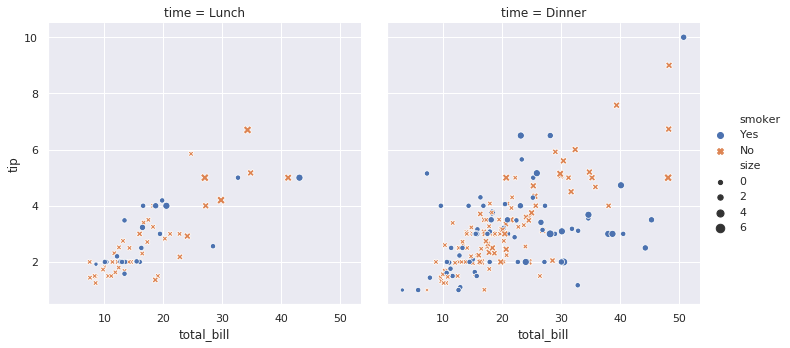

In [2]:
# Python 2.7

# https://seaborn.pydata.org/introduction.html

import seaborn as sns


sns.set() # use the default "theme"
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);


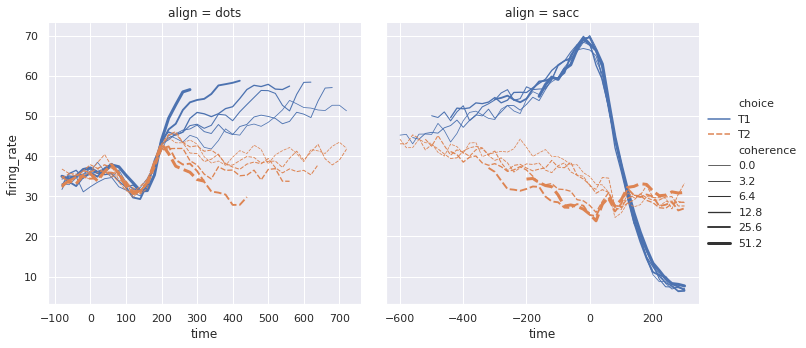

In [9]:
dots = sns.load_dataset("dots")
sns.relplot(x="time", y="firing_rate", col="align", hue="choice", size="coherence", style="choice"
           ,facet_kws=dict(sharex=False),
           kind="line", legend="full", data=dots);

/home/met2dev2user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


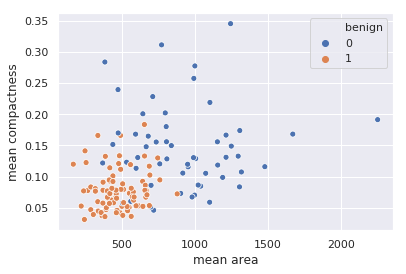

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


sns.set(color_codes=True)
tips = sns.load_dataset("tips")

# math notes
# "Linear Regression" is a way to explain a relationship between a "dependent variable" with an "independent variable"
# using a stright line, thank you

# sns.regplot( x="total_bill", y="tip", data=tips)

## plotting Cancer data
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)